In [145]:
import pandas as pd

# Ruta del archivo .dta original
input_file_path = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104.dta'

# Leer el archivo .dta original
df_04 = pd.read_stata(input_file_path)

# Filtrar las filas donde 'REGION' es igual a 1
df_04_filtrado = df_04[df_04['region'] == "Gran Buenos Aires"].copy()

for col in df_04_filtrado.select_dtypes(include='category').columns:
    df_04_filtrado[col] = df_04_filtrado[col].cat.rename_categories(lambda x: str(x))

# Ruta para guardar el nuevo archivo .dta filtrado
output_file_path = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104_filtrado.dta'

# Guardar el DataFrame filtrado en un nuevo archivo .dta
df_04_filtrado.to_stata(output_file_path)

# Confirmar que se guardó correctamente
print(f"Archivo guardado en: {output_file_path}")

Archivo guardado en: C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104_filtrado.dta


In [ ]:
# Ruta del archivo Excel
file_path_24 = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T124.xlsx'

# Leer el archivo Excel
df_24 = pd.read_excel(file_path_24)

# Filtrar las filas donde 'REGION' es igual a 1
df_24_filtrado = df_24[df_24['REGION'] == 1]

# Guardar el DataFrame filtrado en un nuevo archivo Excel
output_path = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T124_filtrado.xlsx'
df_24_filtrado.to_excel(output_path, index=False)
print(f"Archivo guardado en: {output_file_path}")

In [143]:
import pandas as pd

# Rutas de los archivos
file_path_04 = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104_filtrado.dta'
file_path_24 = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T124_filtrado.xlsx'

# Leer los archivos
df_04 = pd.read_stata(file_path_04)
df_24 = pd.read_excel(file_path_24, engine='openpyxl')

# 1. Normalizar los nombres de las columnas (convertir todo a mayúsculas y quitar espacios)
df_04.columns = df_04.columns.str.strip().str.upper()
df_24.columns = df_24.columns.str.strip().str.upper()

# 2. Filtrar solo las columnas comunes entre los dos DataFrames
columnas_comunes = list(set(df_04.columns) & set(df_24.columns))

# Filtramos ambas bases para que solo contengan las columnas comunes
df_04 = df_04[columnas_comunes].copy()
df_24 = df_24[columnas_comunes].copy()

# 3. Asegurarnos de que todas las columnas tengan el mismo tipo de datos
# Convertimos las columnas que sean numéricas o de tipo float a string si es necesario
for col in columnas_comunes:
    # Si la columna tiene un tipo de datos inconsistente (por ejemplo, mezclado entre string y float), la forzamos a string
    if df_04[col].dtype != df_24[col].dtype:
        try:
            # Convertimos ambas columnas a string (o nan donde sea necesario)
            df_04[col] = df_04[col].apply(lambda x: str(x) if pd.notnull(x) else None)
            df_24[col] = df_24[col].apply(lambda x: str(x) if pd.notnull(x) else None)
        except Exception as e:
            print(f"Error al convertir columna {col}: {e}")

# 4. Unir ambos DataFrames
df_unido = pd.concat([df_04, df_24], ignore_index=True)

# 6. Exportar el DataFrame unido a un archivo .dta (Stata)
output_path = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104_T124_unido.dta'
df_unido.to_stata(output_path, write_index=False)

print(f"Archivo final guardado en:\n{output_path}")

✅ Archivo final guardado en:
C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104_T124_unido.dta


In [122]:
import numpy as np
import pandas as pd

# Evita el warning por downcasting
pd.set_option('future.no_silent_downcasting', True)

# Variables a trabajar
variables = ['PP11A', 'CH15', 'CAT_OCUP', 'CAT_INAC', 'V18_M',
             'V11_M', 'V19_AM', 'V5_M', 'V2_M', 'ESTADO',
             'NIVEL_ED', 'CH07', 'CH06', 'CH04', 'ANO4']

df_limpio = df_unido.copy()

# Valores a reemplazar por NaN
valores_invalidos = ['99', '999', '9999', '-1', '-9', '0', '0.0', 'Ns./Nr.',
                     'Entrevista individual no realizada (no respuesta al cuestion)', None]

# Paso 1: Reemplazo de valores inválidos *Clean
for col in variables:
    df_limpio[col] = df_limpio[col].replace(valores_invalidos, np.nan, regex=False)

# Paso 2: Conversión condicional a numérico (solo si los valores no nulos parecen ser todos dígitos)
for col in variables:
    muestra = df_limpio[col].dropna().astype(str)
    if not muestra.empty and muestra.apply(lambda x: x.replace('.', '', 1).isdigit()).all():
        df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')

# Paso 3: Filtro por año
df_limpio['ANO4'] = pd.to_numeric(df_limpio['ANO4'], errors='coerce')
df_2004 = df_limpio[df_limpio['ANO4'] == 2004]
df_2024 = df_limpio[df_limpio['ANO4'] == 2024]

# Paso 4: Conteo de nulos por variable y año
print("Valores nulos por variable:")
for var in variables:
    nulos_2004 = df_2004[var].isnull().sum()
    nulos_2024 = df_2024[var].isnull().sum()
    display(f"{var} - 2004: {nulos_2004} | 2024: {nulos_2024}")

Valores nulos por variable:


'PP11A - 2004: 7261 | 2024: 6812'

'CH15 - 2004: 3 | 2024: 0'

'CAT_OCUP - 2004: 4177 | 2024: 3588'

'CAT_INAC - 2004: 3617 | 2024: 3576'

'V18_M - 2004: 7642 | 2024: 7044'

'V11_M - 2004: 7634 | 2024: 6983'

'V19_AM - 2004: 7647 | 2024: 7051'

'V5_M - 2004: 7540 | 2024: 6788'

'V2_M - 2004: 6883 | 2024: 5886'

'ESTADO - 2004: 0 | 2024: 41'

'NIVEL_ED - 2004: 0 | 2024: 0'

'CH07 - 2004: 0 | 2024: 0'

'CH06 - 2004: 0 | 2024: 51'

'CH04 - 2004: 0 | 2024: 0'

'ANO4 - 2004: 0 | 2024: 0'

In [123]:
#Conteo de nulos por variable y año
nulos_data = []

# Contar nulos para cada variable por año (2004 y 2024)
for var in variables:
    nulos_2004 = df_limpio[df_limpio['ANO4'] == 2004][var].isnull().sum()
    nulos_2024 = df_limpio[df_limpio['ANO4'] == 2024][var].isnull().sum()

    # Agregar los datos a la lista con el identificador de año
    nulos_data.append([var, '2004', nulos_2004])
    nulos_data.append([var, '2024', nulos_2024])

# Crear DataFrame con los resultados
df_nulos = pd.DataFrame(nulos_data, columns=['Variable', 'Año', 'Total_Nulos'])

# Ordenar por total de nulos de manera descendente
df_nulos_sorted = df_nulos.sort_values(by='Total_Nulos', ascending=False)

# Imprimir la tabla ordenada
display(df_nulos_sorted.head(5))

,Variable,Año,Total_Nulos
12,V19_AM,2004,7647
8,V18_M,2004,7642
10,V11_M,2004,7634
14,V5_M,2004,7540
0,PP11A,2004,7261


In [124]:
# Variables a revisar
variables = ['PP11A', 'CH15', 'CAT_OCUP', 'CAT_INAC', 'V18_M',
             'V11_M', 'V19_AM', 'V5_M', 'V2_M', 'ESTADO',
             'NIVEL_ED', 'CH07', 'CH06', 'CH04', 'ANO4']

# Obtener y mostrar solo los valores negativos para cada variable
for col in variables:
    # Convertir la columna a numérico
    df_unido[col] = pd.to_numeric(df_unido[col], errors='coerce')
    
    # Filtrar los valores negativos
    negativos = df_unido[col][df_unido[col] < 0].unique()
    
    # Mostrar solo las columnas que tienen valores negativos
    if len(negativos) > 0:
        print(f"Valores negativos en la columna {col}:")
        print(negativos)
        print("\n")
# En este paso mostramos que variables tienen valores negativos. Esos valores los habiamos limpiado antes en *Clean.

Valores negativos en la columna V18_M:
[-9.]


Valores negativos en la columna V11_M:
[-9.]


Valores negativos en la columna V5_M:
[-9.]


Valores negativos en la columna V2_M:
[-9.]


Valores negativos en la columna CH06:
[-1.]




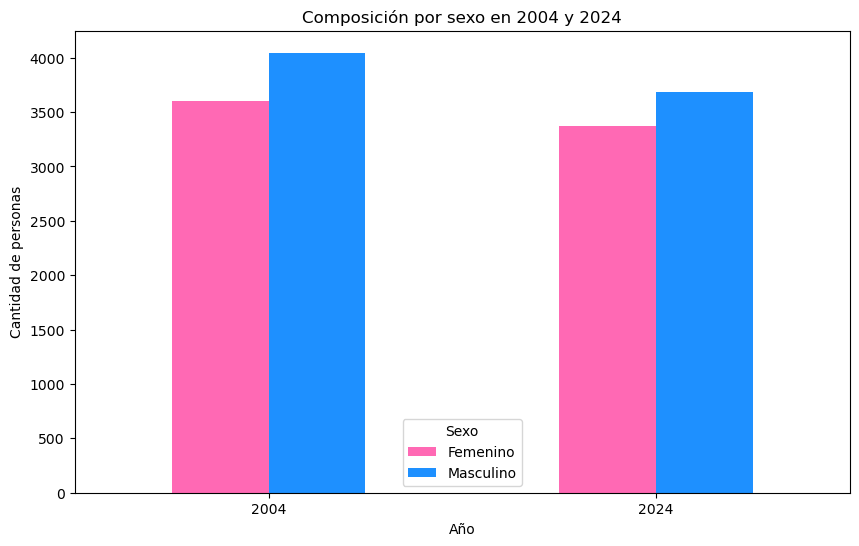

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Reemplazar los valores de 'Varón' y 'Mujer' con 1 y 2 respectivamente
df_limpio['CH04'] = df_limpio['CH04'].replace({'Varón': 1, 'Mujer': 2, '1': 1, '2': 2})

# Convertir 'ANO4' a tipo int para eliminar el '.0'
df_limpio['ANO4'] = df_limpio['ANO4'].astype(int)

# Filtramos los datos para los años 2004 y 2024
df_filtrado = df_limpio[df_limpio['ANO4'].isin([2004, 2024])]

# Contamos las ocurrencias por sexo y año
sexo_por_ano = df_filtrado.groupby(['ANO4', 'CH04']).size().unstack().fillna(0)

# Colores personalizados
colores = ['#FF69B4', '#1E90FF']  # Rosa para Femenino, Azul para Masculino

# Graficamos el gráfico de barras
ax = sexo_por_ano.plot(kind='bar', stacked=False, figsize=(10, 6), color=colores)

# Añadimos títulos y etiquetas
plt.title('Composición por sexo en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)

# Personalizamos los ticks del eje Y para eliminar el ".0"
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x)}'))

# Añadimos la leyenda y etiquetas personalizadas
plt.legend(title='Sexo', labels=['Femenino', 'Masculino'])

# Mostramos el gráfico
plt.show()